# Detection of Functional Interaction Structure

This Notebook exemplifies the methodology to detect the functional interaction structure of software development teams as explained in the paper:
```
Title:   Detecting the Functional Interaction Structure of Software Development Teams
Authors: Christian Zingg, Alexander von Gernler, Carsten Arzig, Frank Schweitzer, Christoph Gote
```

Notice that Figures 2, 3, and 5 in the paper were rendered in TikZ and not R, and therefore there are visual differences to this Jupyter Notebook.

## Initialization

In [1]:
# Load libraries
library(igraph)
library(magrittr)
library(potentiality)
source("libs/organigraph.r")

if (packageVersion("ghypernet") <= "1.1.0")
    stop("Script incompatible with ghypernet versions until 1.1.0")


# Tools and Settings
role_colors <- c("Developer" = "#d39996", "Stakeholder" = "#97afd5", "Product-Owner" = "#90c1bf")
plot_helper <- function(role_network) {
    plot_role_network(role_network, role_colors = role_colors, node_sizes_range_to = 20,
                      show_weights = TRUE, margin = rep(0.2, 4))
}


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: parallel


Attaching package: ‘purrr’


The following object is masked from ‘package:magrittr’:

    set_names


The following objects are masked from ‘package:igraph’:

    compose, simplify



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard



Attaching package: ‘tibble’


The following object is masked from ‘package:assertthat’:

    has_name


The following object is masked from ‘package:igraph’:

    as_data_frame



Attaching package: ‘tidygraph’


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter




## Replicate Figure 3(a)

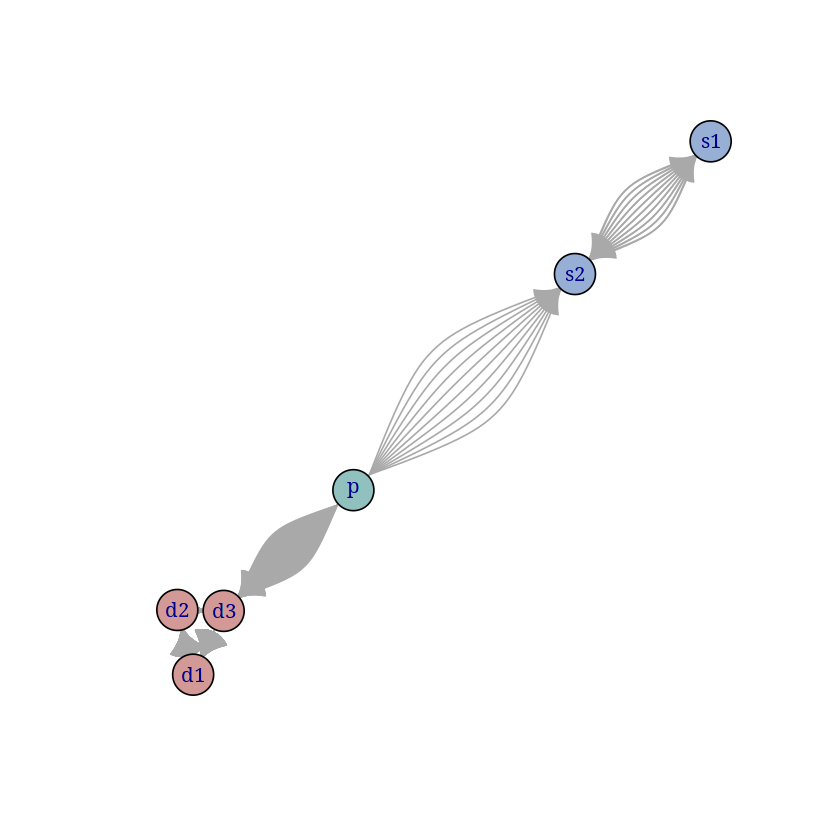

In [2]:
example_network <- make_empty_graph(0) +
    vertices(name = c("d1", "d2", "d3", "s1", "s2", "p"),
             role = c(rep("Developer", 3), rep("Stakeholder", 2), "Product-Owner")) +
    edges(rep(c("d1", "d2"), 500),
          rep(c("d2", "d3"), 500),
          rep(c("d3", "d1"), 500),
          rep(c("s1", "s2"), 10),
          rep(c("s2", "s1"), 10),
          rep(c("p",  "d3"), 50),
          rep(c("p",  "s2"), 10))
plot(example_network, vertex.color = role_colors[V(example_network)$role])

## Replicate Figure 3(b)

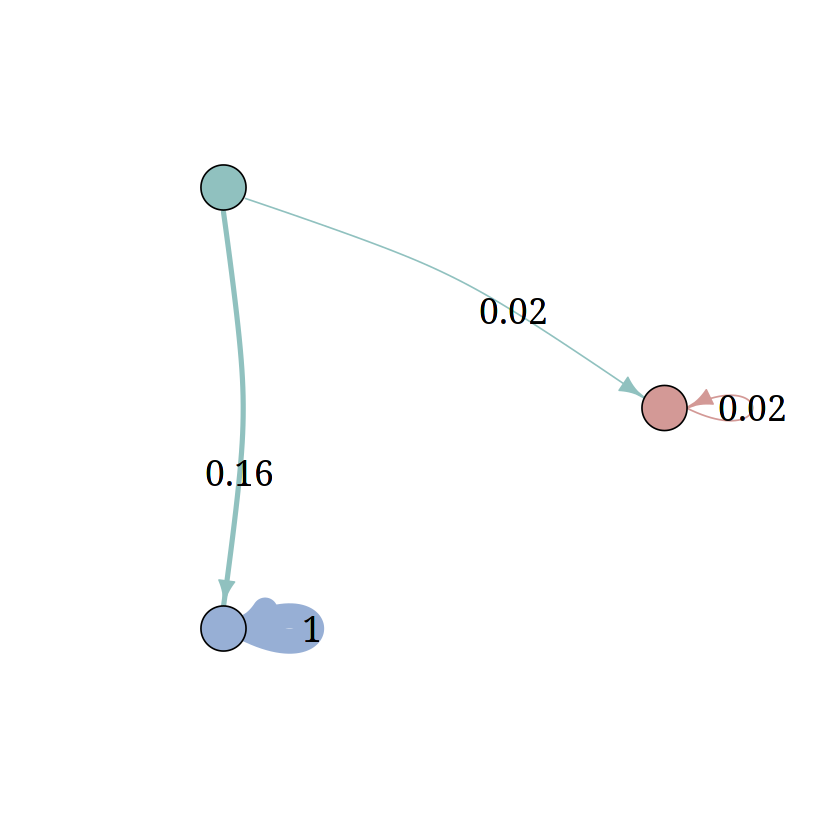

In [3]:
ens <- role_ensemble(example_network)

plot_helper(role_network_bccm(ens))

## Replicate Figure 3(c)

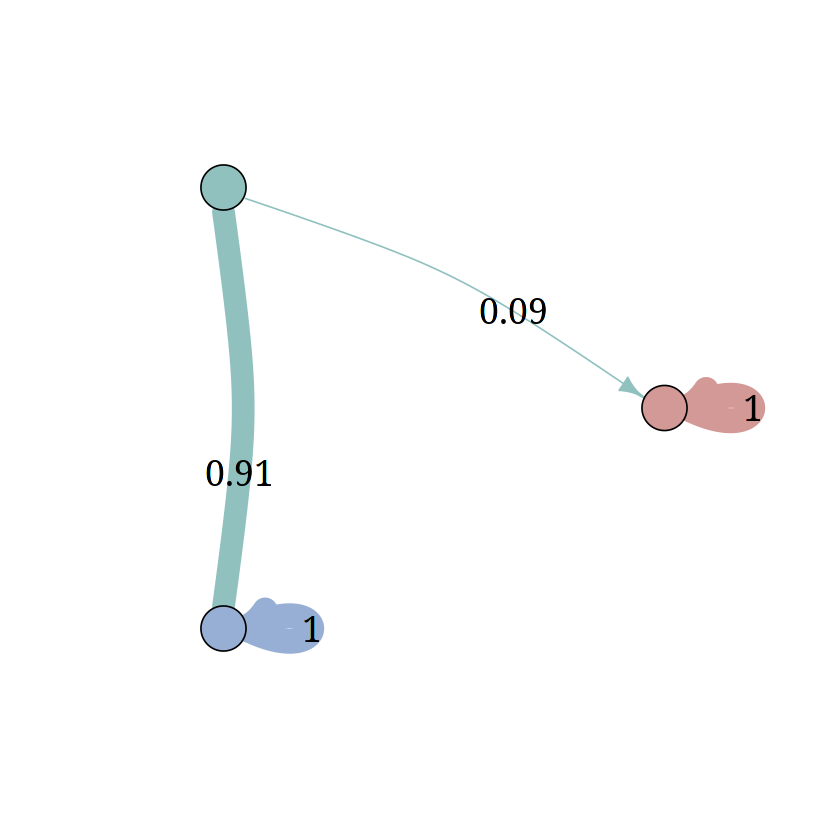

In [4]:
plot_helper(role_network_bccm_norm(ens))

## Replicate Figure 5(b)

Different from the paper, this Jupyter Notebook uses the synthetic data from above because the data from _genua GmbH_ is confidential and cannot be released.

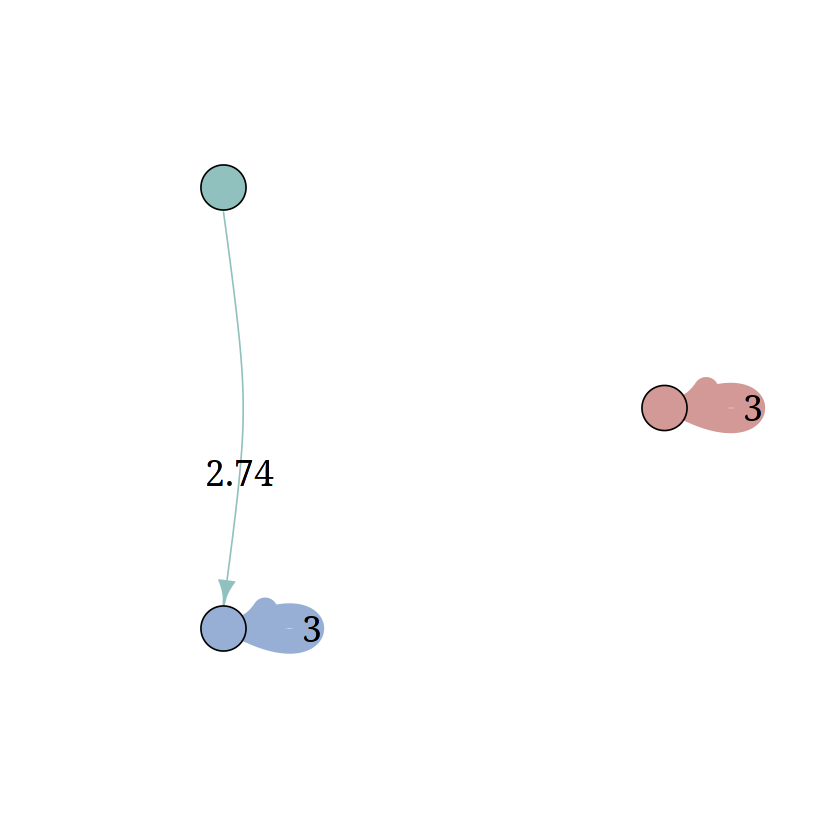

In [5]:
# Positive Preferences
#     Example: a value of $2.74$ means that the measured preference is $2.74$ times
#         larger than the expected value from the random baseline.

plot_helper(role_network_bccm_norm(ens, "positive"))

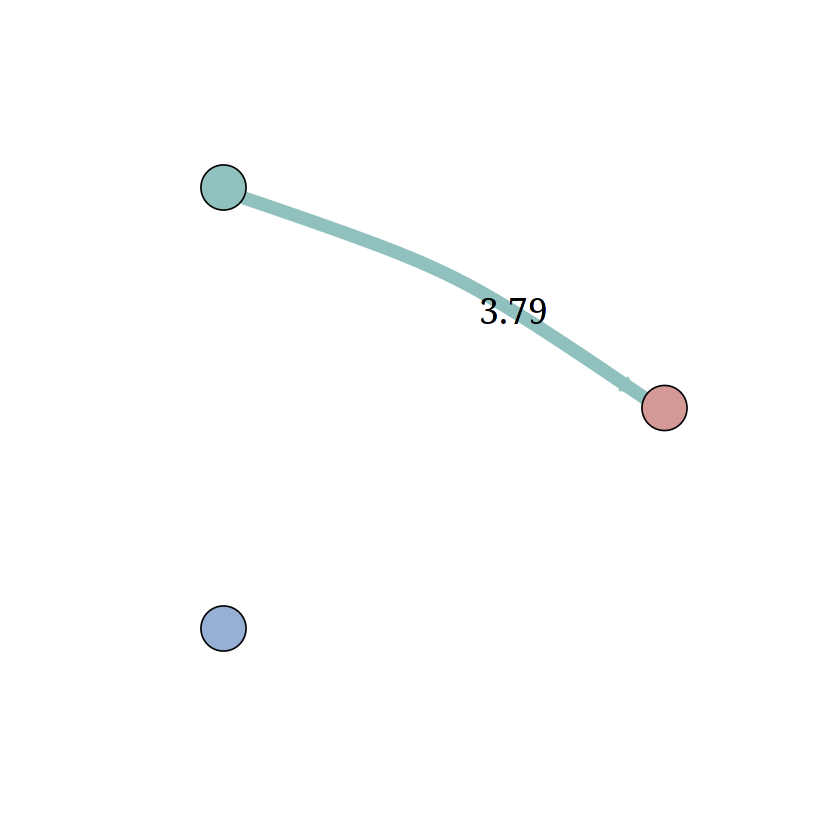

In [6]:
# Negative Preferences
#     Example: a value of $3.79$ means that the measured preference is $3.79$ times
#         smaller than the expected value from the random baseline.

plot_helper(role_network_bccm_norm(ens, "negative"))

## Replicate Figure 7

We show the computation of the observed interactions (`obsInt`) and the two benchmark scenarios `ecdeDevs` and `ecdeAll` explained in the paper.
Different from the paper, this Jupyter Notebook uses the synthetic data from above because the data from _genua GmbH_ is confidential and cannot be released.

Note that the `Developer` role in `example_network` has a strong preference to interact with members of the same role but nobody else.
In scenario `ecdeDevs`, this tendency will be broken up, resulting in a higher potentiality than `obsInt`.
In scenario `ecdeAll`, the tendencies will be broken up for all roles, especially also for the `Stakeholders` who interact preferentially among themselves too.
This will result in an even higher potentiality in the scenario `ecdeAll` than in `ecdeDevs`.
In total, we expect the following ordering:
$$\text{potentiality}(\text{obsInt}) \leq \text{potentiality}(\text{ecdeDevs}) \leq \text{potentiality}(\text{ecdeAll})$$

In [7]:
# Fit ensemble for ecdeDevs

#' Replace role of each node with a unique role except for Developers.
replace_roles_devonly <- function(network) {
    V(network)$role <- ifelse(V(network)$role == "Developer", "Developer", paste0("meta_", V(network)$name))
    return(network)
}

ens_devonly <- role_ensemble(replace_roles_devonly(example_network))

In [8]:
# Compute benchmark values

cat("obsInt:   ", potentiality(example_network), "\n")
cat("ecdeDevs: ", quantile(benchmark_scenario(ens_devonly, potentiality), c(0.025, 0.975)), "\n")
cat("ecdeAll:  ", quantile(benchmark_scenario(ens, potentiality), c(0.025, 0.975)))

obsInt:    0.2018217 
ecdeDevs:  0.3621336 0.3764358 
ecdeAll:   0.3688219 0.396258

## sessionInfo

In [9]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 23.04

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.11.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_CH.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_CH.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_CH.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_CH.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tidygraph_1.3.0    tibble_3.2.1       scales_1.2.1       purrr_1.0.1       
 [5] pbmcapply_1.5.1    ghypernet_1.1.1.1  assertthat_0.2.1   potentiality_0.2.0
 [9] magrittr_2.0.3     igraph_1.6.0      

loaded via a namespace (and not attac